In [4]:
!pip install plotly

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go


In [3]:
# Load dataset - 1 (evdb_Jayasri.csv as ds1)
ds1 = pd.read_csv('evdb_Jayasri.csv')
print("Dataset 1 (evdb_Jayasri.csv):")
print(ds1.head())

Dataset 1 (evdb_Jayasri.csv):
   Year Month_name  Day        Date             State  \
0  2024        dec    1  2024-12-01           Gujarat   
1  2024        dec    1  2024-12-01  Himachal Pradesh   
2  2024        dec    1  2024-12-01  Himachal Pradesh   
3  2024        dec    1  2024-12-01  Himachal Pradesh   
4  2024        dec    1  2024-12-01  Himachal Pradesh   

                        Vehicle Class Vehicle Category Vehicle Type  CNG ONLY  \
0             VEHICLE FITTED WITH RIG           Others       Others         0   
1                AGRICULTURAL TRACTOR           Others       Others         0   
2                           AMBULANCE           Others       Others         0   
3                                 BUS              Bus          Bus         0   
4  CAMPER VAN / TRAILER (PRIVATE USE)           Others       Others         0   

   DIESEL  ...  PETROL/ETHANOL  PETROL/HYBRID  PETROL/LPG  PETROL/METHANOL  \
0       1  ...               0              0           0     

In [9]:
# Load dataset - 2 (ev_sales_by_makers_and_cat_15-24.csv as ds2)
ds2 = pd.read_csv('ev_sales_by_makers_and_cat_15-24.csv')
print("\nDataset 2 (ev_sales_by_makers_and_cat_15-24.csv):")
print(ds2.head())


Dataset 2 (ev_sales_by_makers_and_cat_15-24.csv):
  Cat                          Maker  2015  2016  2017  2018  2019  2020  \
0  3W    "VOLVO GROUP INDIA PVT LTD"     0     0    31    12     0     0   
1  3W         3EV INDUSTRIES PVT LTD     0     0     0     0     0     0   
2  2W         3GB TECHNOLOGY PVT LTD     0     0     0     1     0     0   
3  3W         3GB TECHNOLOGY PVT LTD     0     1     1     0     0     0   
4  3W  3S INDUSTRIES PRIVATE LIMITED     0     0     0     0    48    66   

   2021  2022  2023  2024  
0     0     0     0     0  
1   112   390   545    51  
2     0     0     0     0  
3     0     0     0     0  
4    43    68   266   578  


In [17]:
# Print columns for debugging
print("d1 columns:", ds1.columns.tolist())
print("d2 columns:", ds2.columns.tolist())

# Convert vehicle category records in ds1's Vehicle Category column (full names to abbreviations)
ds1['Vehicle Category'] = ds1['Vehicle Category'].replace({
    '2-Wheelers': '2W',
    '3-Wheelers': '3W',
    '4-Wheelers': '4W',
    'Bus': '6W'
})
print("\nd1 with abbreviated vehicle category records:")
print(ds1.head())

d1 columns: ['Year', 'Month_name', 'Day', 'Date', 'State', 'Vehicle Class', 'Vehicle Category', 'Vehicle Type', 'CNG ONLY', 'DIESEL', 'DIESEL/HYBRID', 'DI-METHYL ETHER', 'DUAL DIESEL/BIO CNG', 'DUAL DIESEL/CNG', 'DUAL DIESEL/LNG', 'ELECTRIC(BOV)', 'ETHANOL', 'FUEL CELL HYDROGEN', 'LNG', 'LPG ONLY', 'METHANOL', 'NOT APPLICABLE', 'PETROL', 'PETROL/CNG', 'PETROL/ETHANOL', 'PETROL/HYBRID', 'PETROL/LPG', 'PETROL/METHANOL', 'SOLAR', 'Total', 'PLUG-IN HYBRID EV', 'PURE EV', 'STRONG HYBRID EV', 'Vehicle Use type']
d2 columns: ['Cat', 'Maker', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

d1 with abbreviated vehicle category records:
   Year Month_name  Day        Date             State  \
0  2024        dec    1  2024-12-01           Gujarat   
1  2024        dec    1  2024-12-01  Himachal Pradesh   
2  2024        dec    1  2024-12-01  Himachal Pradesh   
3  2024        dec    1  2024-12-01  Himachal Pradesh   
4  2024        dec    1  2024-12-01  Himachal P

In [13]:

# checking the shape (# of rows and columns) of the datasets
print('D1 Shape: ', ds1.shape)
print('D2 Shape: ', ds2.shape)


D1 Shape:  (106669, 34)
D2 Shape:  (1386, 12)


In [18]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(ds1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(ds2.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106669 entries, 0 to 106668
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 106669 non-null  int64  
 1   Month_name           106669 non-null  object 
 2   Day                  106669 non-null  int64  
 3   Date                 106669 non-null  object 
 4   State                106669 non-null  object 
 5   Vehicle Class        106669 non-null  object 
 6   Vehicle Category     106667 non-null  object 
 7   Vehicle Type         106667 non-null  object 
 8   CNG ONLY             106669 non-null  int64  
 9   DIESEL               106669 non-null  int64  
 10  DIESEL/HYBRID        106669 non-null  int64  
 11  DI-METHYL ETHER      106669 non-null  int64  
 12  DUAL DIESEL/BIO CNG  106669 non-null  int64  
 13  DUAL DIESEL/CNG      106669 non-null  int64 

In [19]:
# getting a statistical summary of the datasets
d1 = ds1.describe()
d2 = ds2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,Year,Day,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),...,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total,PLUG-IN HYBRID EV,PURE EV,STRONG HYBRID EV
count,106669.000000,106669.0,106669.000000,106669.000000,106669.000000,106669.0,106669.0,106669.000000,106669.000000,106669.000000,...,106669.000000,106669.000000,106669.000000,106669.000000,106669.0,106669.000000,106669.000000,9824.000000,9824.000000,9824.000000
mean,2019.099120,1.0,14.721672,269.579494,1.508808,0.0,0.0,0.000431,0.000206,45.836025,...,38.572069,9.659564,10.250785,5.821682,0.0,0.007809,2267.470249,0.003257,49.768933,5.403094
std,3.159352,0.0,165.863291,1048.729939,28.056768,0.0,0.0,0.026335,0.061389,489.613721,...,385.693265,225.777629,113.711474,79.569094,0.0,0.231377,12928.047857,0.086734,494.603160,54.255951
min,2014.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2016.000000,1.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,1.0,0.000000,5.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,25.000000,0.000000,0.000000,0.000000
75%,2022.000000,1.0,0.000000,58.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,249.000000,0.000000,0.000000,0.000000
max,2024.000000,1.0,9482.000000,25015.000000,2004.000000,0.0,0.0,3.000000,20.000000,25817.000000,...,19527.000000,17266.000000,4276.000000,4047.000000,0.0,26.000000,475359.000000,5.000000,20351.000000,1548.000000


'<<< DATASET 2 >>>'

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,5.593074,35.533189,62.784271,93.624098,119.614719,89.300144,237.268398,736.315296,1103.343434,706.308081
std,62.430741,400.757230,496.932817,511.486338,692.529043,504.744348,1793.878376,5917.016908,9631.219039,7022.251339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,3.000000,6.000000,10.000000,7.000000,13.000000,39.000000,96.000000,79.000000
max,1708.000000,13401.000000,15094.000000,10816.000000,13213.000000,9543.000000,46260.000000,109398.000000,267355.000000,211273.000000


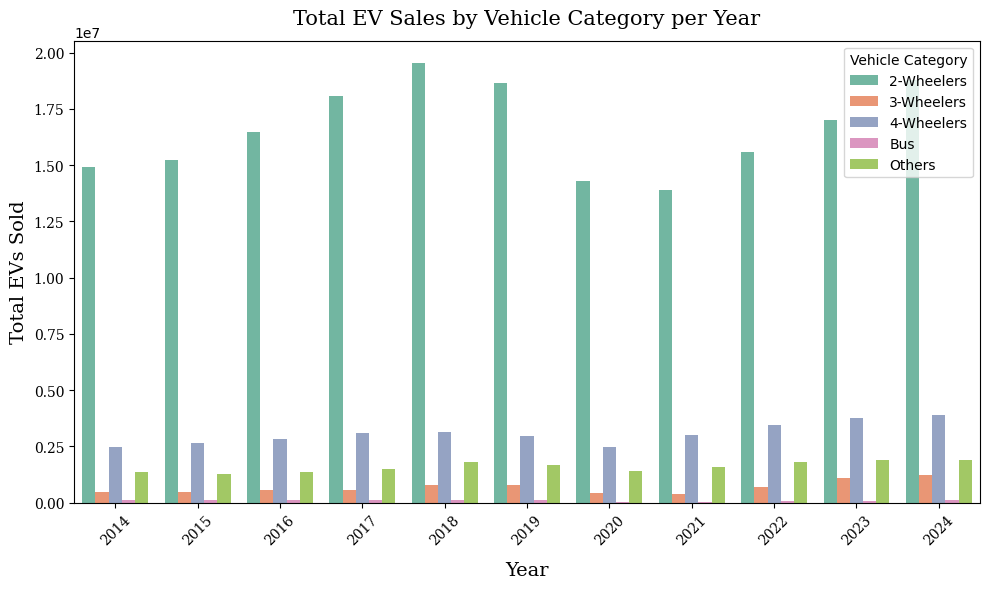

In [69]:
# Plot : Total EV Sales by Vehicle Category per Year
plt.figure(figsize=(10, 6))
g_ds1 = ds1.groupby(['Year', 'Vehicle Category'])['Total'].sum().reset_index()
sns.barplot(data=g_ds1, x='Year', y='Total', hue='Vehicle Category', palette='Set2')
plt.title('Total EV Sales by Vehicle Category per Year', weight=200, family='serif', size=15, pad=12)
plt.xlabel('Year', fontsize=14, family='serif', labelpad=10)
plt.ylabel('Total EVs Sold', fontsize=14, family='serif')
plt.legend(title='Vehicle Category', loc='best')
plt.xticks(rotation=45, family='serif')
plt.yticks(family='serif')
plt.tight_layout()
plt.show()

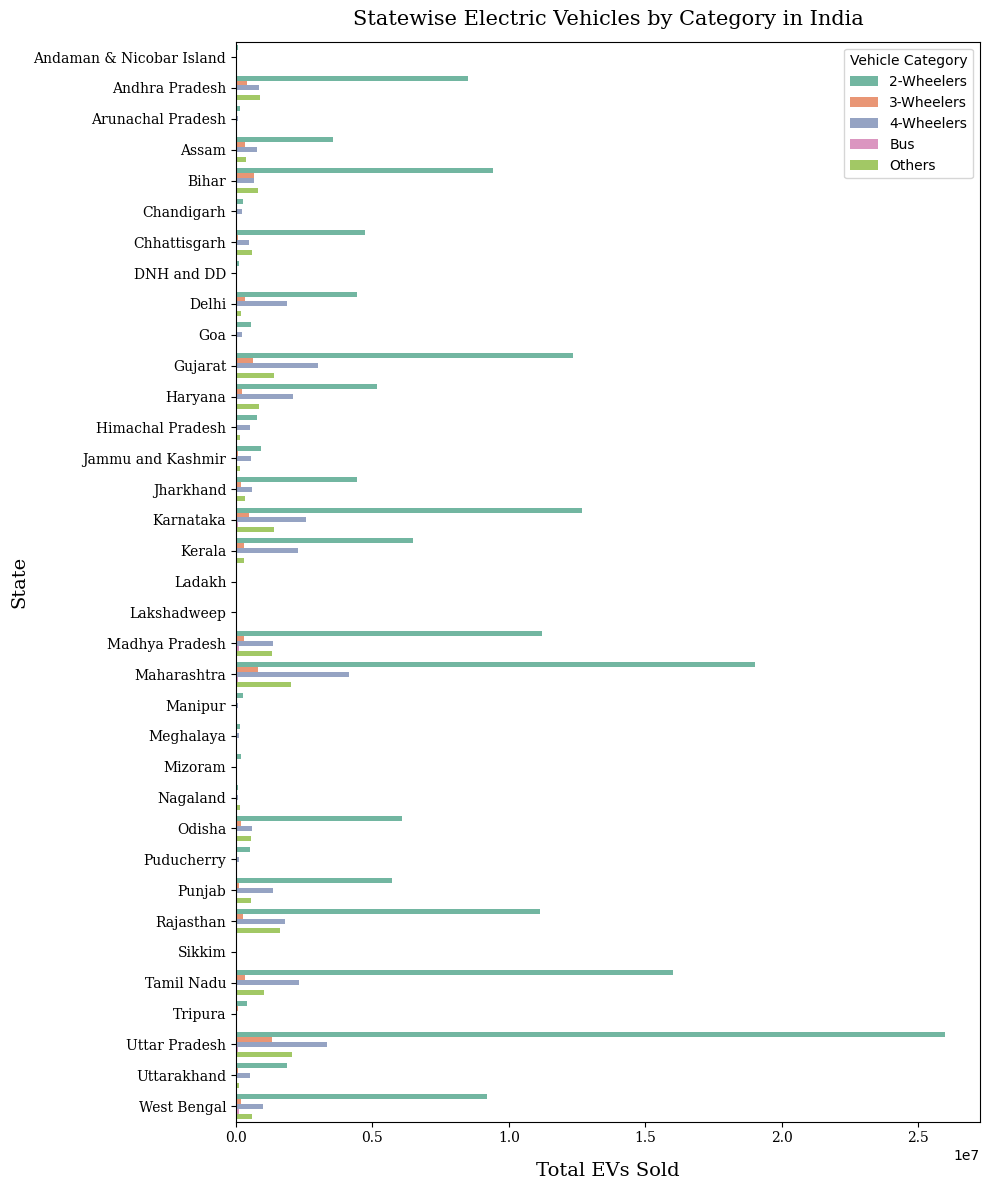

In [125]:
# Plot: Total EV Sales by Vehicle Category per State
plt.figure(figsize=(10, 12))
ds1_agg = ds1.groupby(['State', 'Vehicle Category'])['Total'].sum().reset_index()
sns.barplot(data=ds1_agg, y='State', x='Total', hue='Vehicle Category', palette='Set2')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Total EVs Sold', fontsize=14, family='serif', labelpad=12)
plt.title('Statewise Electric Vehicles by Category in India', weight=200, family='serif', size=15, pad=12)
plt.legend(title='Vehicle Category', loc='best')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.tight_layout()
plt.show()

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\2804290911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ds1, y=ds1['State'].sort_values(ascending=True), x='Total', palette='viridis')


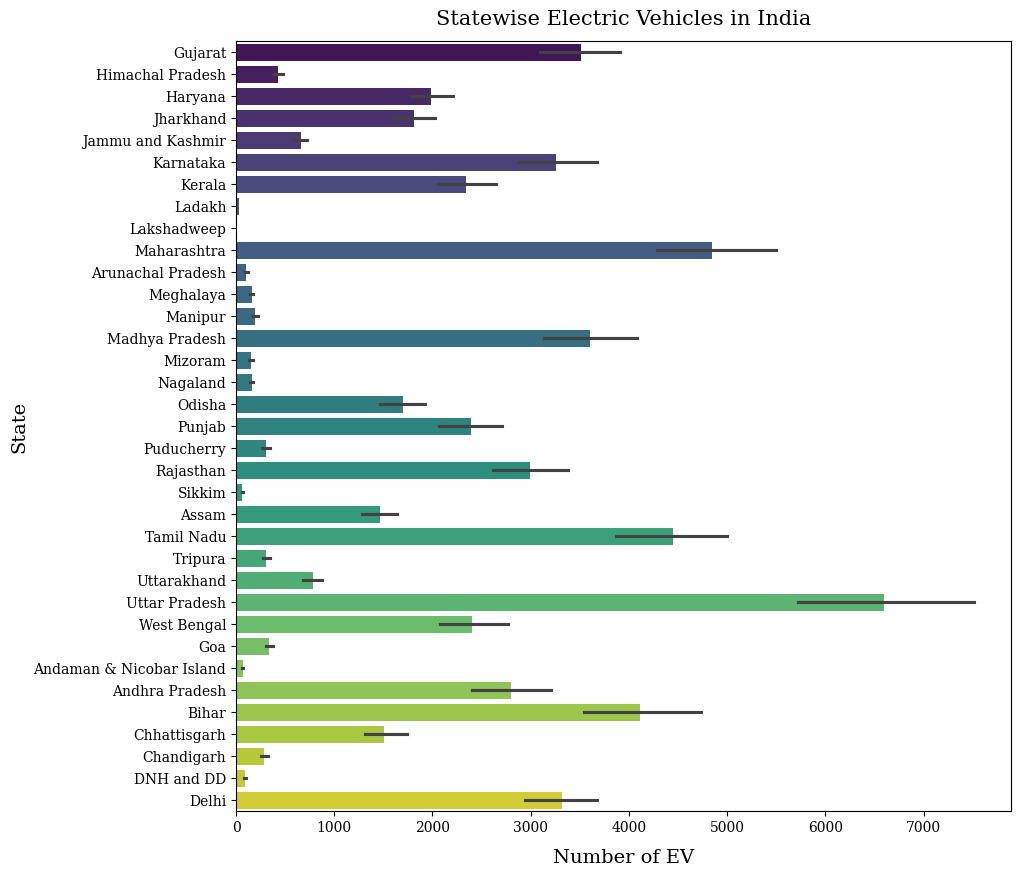

In [111]:
plt.figure(figsize=(10, 10))
sns.barplot(data=ds1, y=ds1['State'].sort_values(ascending=True), x='Total', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV' ,family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

In [303]:
# Analysis of Data set 2
# Preprocess: Aggregate sales by category (2W, 3W, LMV, MMV) for each year
year_columns = [str(year) for year in range(2015, 2025)]
sales_by_cat = ds2.groupby('Cat')[year_columns].sum().reset_index()

# Filter relevant categories
valid_cats = ['2W', '3W', 'LMV', 'MMV']
sales_by_cat = sales_by_cat[sales_by_cat['Cat'].isin(valid_cats)]

# Find top vehicle type in 2024
top_type = sales_by_cat.loc[sales_by_cat['2024'].idxmax(), 'Cat']
top_sales = sales_by_cat['2024'].max()

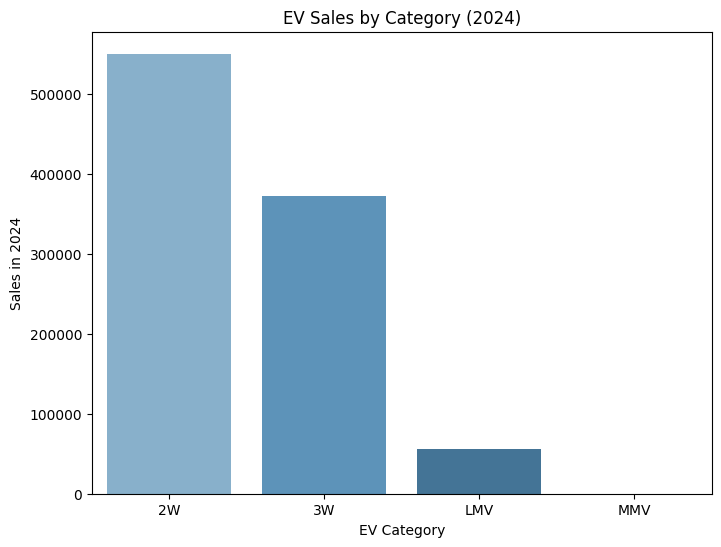

Recommended EV type: 2W


In [309]:
# plot - Bar Chart: Total Sales by Category (2024)
plt.figure(figsize=(8, 6))
sns.barplot(x='Cat', y='2024', hue='Cat', palette='Blues_d', data=sales_by_cat, legend=False)
plt.xlabel('EV Category')
plt.ylabel('Sales in 2024')
plt.title('EV Sales by Category (2024)')
plt.savefig('ev_sales_2024.png')
plt.show()
print("Recommended EV type:", top_type)

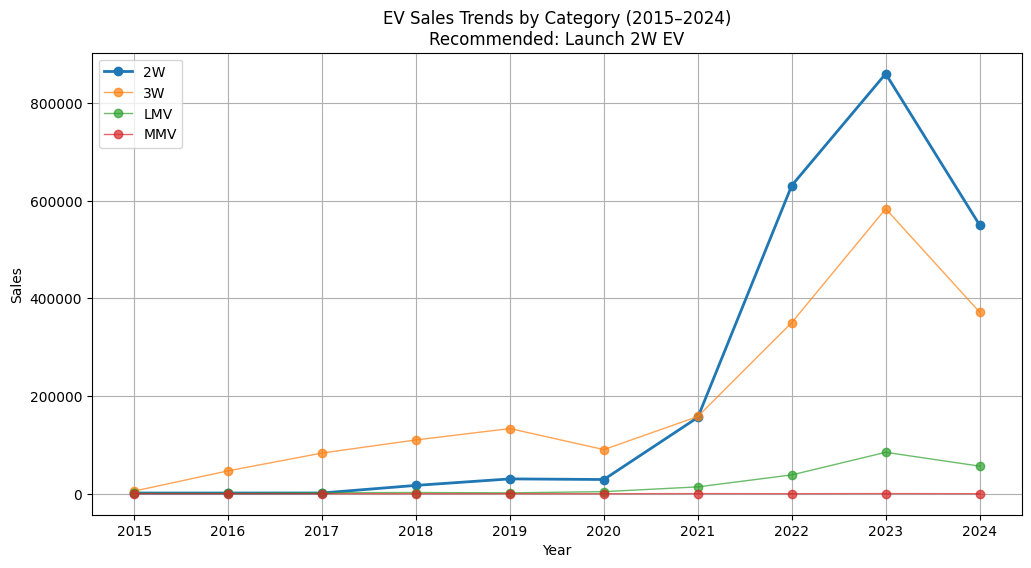

In [311]:
# Plot: Line Plot - Sales Trends (2015–2024)
plt.figure(figsize=(12, 6))
for cat in sales_by_cat['Cat']:
    plt.plot(year_columns, sales_by_cat[sales_by_cat['Cat'] == cat][year_columns].values.flatten(), 
             marker='o', label=cat, linewidth=2 if cat == top_type else 1, 
             alpha=1.0 if cat == top_type else 0.7)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title(f'EV Sales Trends by Category (2015–2024)\nRecommended: Launch {top_type} EV')
plt.legend()
plt.grid(True)
plt.savefig('ev_sales_trends.png')
plt.show()

In [10]:
ev_market_clean = ds2.dropna().select_dtypes(include='number')
scaler = StandardScaler()
ev_market_scaled = scaler.fit_transform(ev_market_clean)

In [11]:
pca = PCA(n_components=2)
ev_market_pca = pca.fit_transform(ev_market_scaled)

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(ev_market_pca)

In [13]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

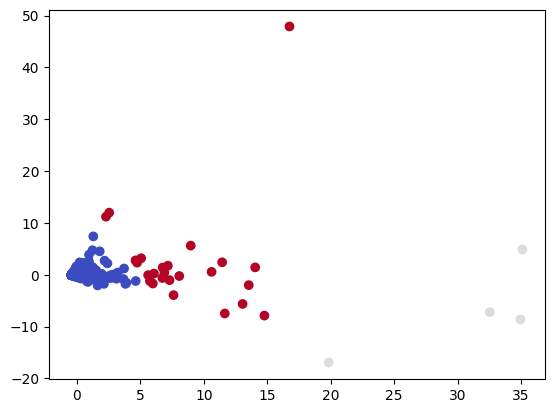

In [14]:
plt.scatter(ev_market_pca[:, 0], ev_market_pca[:, 1], c=labels, cmap='coolwarm')

In [15]:
ev_market_clean = ds2.dropna().select_dtypes(include='number')

In [16]:
scaler = StandardScaler()
ev_market_scaled = scaler.fit_transform(ev_market_clean)

In [17]:
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(ev_market_scaled)
    sse.append(km.inertia_)

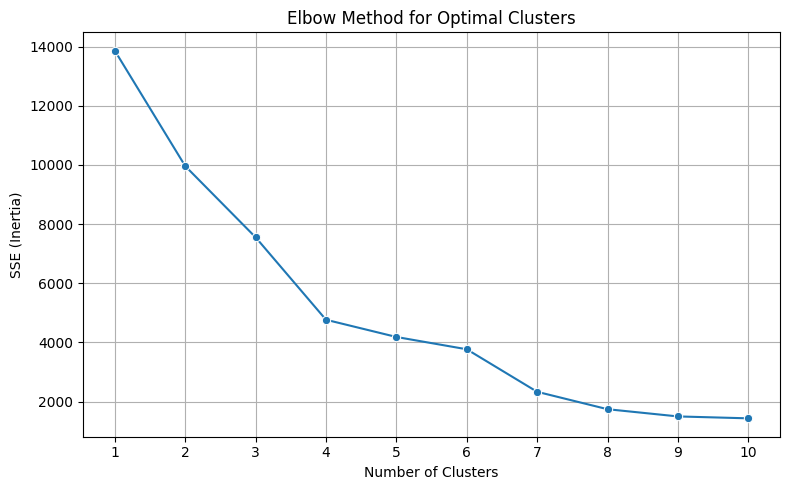

In [18]:
#data set 2
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=sse, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(ev_market_scaled)

In [20]:
pca = PCA(n_components=2)
ev_market_pca = pca.fit_transform(ev_market_scaled)
centroids = pca.transform(kmeans.cluster_centers_)

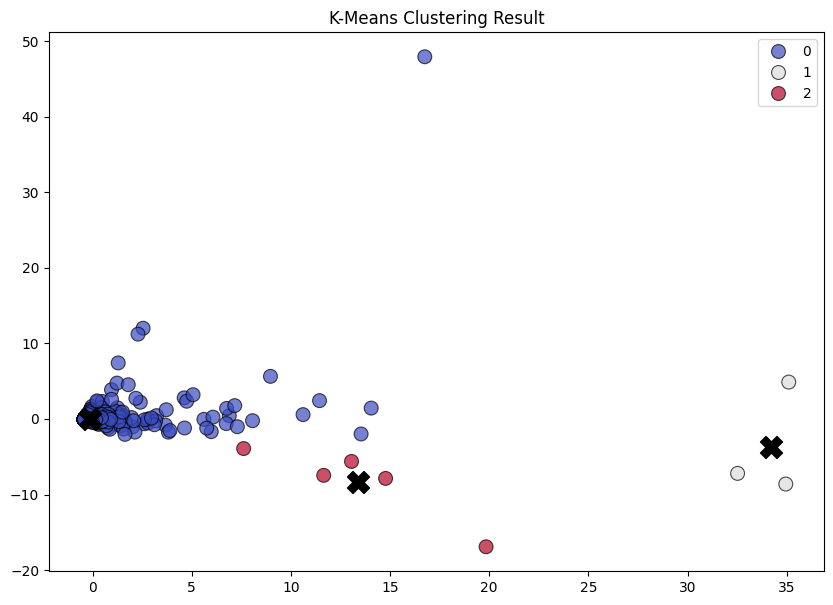

In [21]:
plt.figure(figsize=(10, 7))
plt.title("K-Means Clustering Result")
sns.scatterplot(x=ev_market_pca[:, 0], y=ev_market_pca[:, 1], hue=labels, palette='coolwarm', s=100, alpha=0.7, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='black', marker='X', label='Centroids')

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3479461687.py:4: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



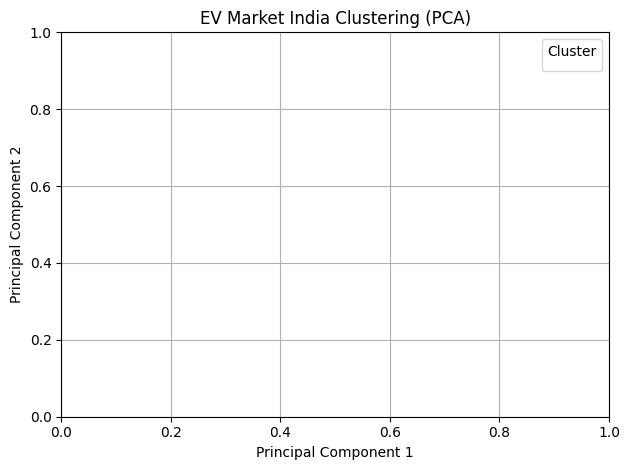

In [280]:
plt.title("EV Market India Clustering (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [281]:
print(ev_market_clean.shape)  
print(len(labels))      
print(ev_market_clean.shape)
ev_market_clean['Cluster'] = labels

(1386, 10)
1386
(1386, 10)


C:\Users\saija\AppData\Local\Temp\ipykernel_31496\1341450433.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




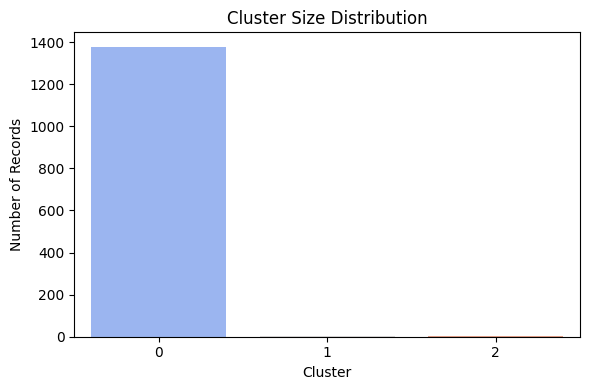

In [283]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=ev_market_clean, palette='coolwarm')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()

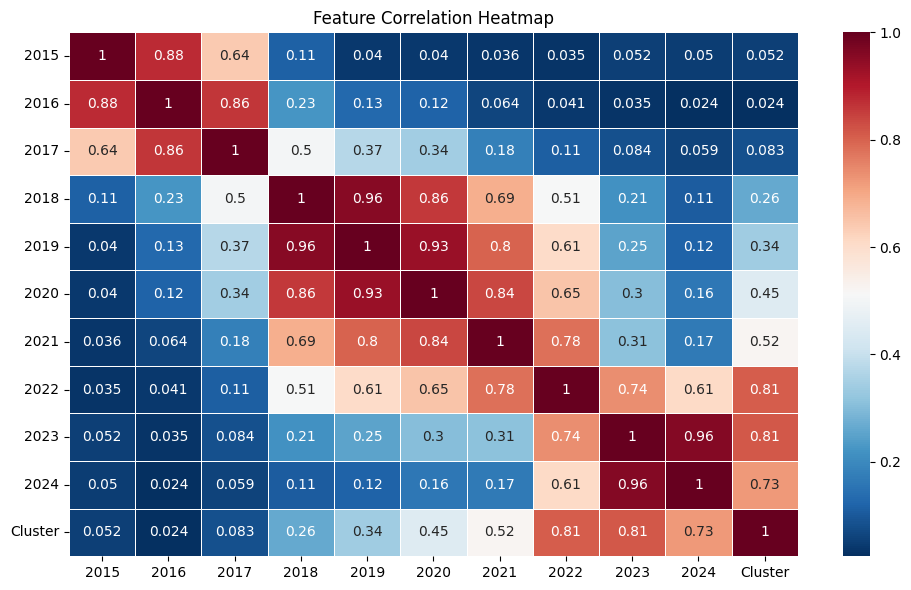

In [284]:
plt.figure(figsize=(10, 6))
sns.heatmap(ev_market_clean.corr(), annot=True, cmap='RdBu_r', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




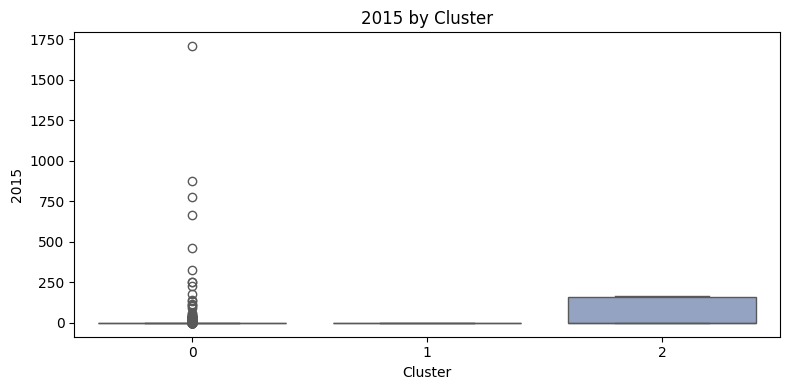

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




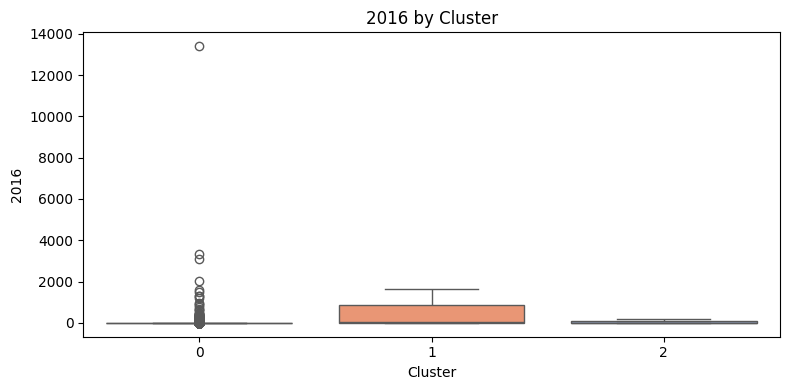

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




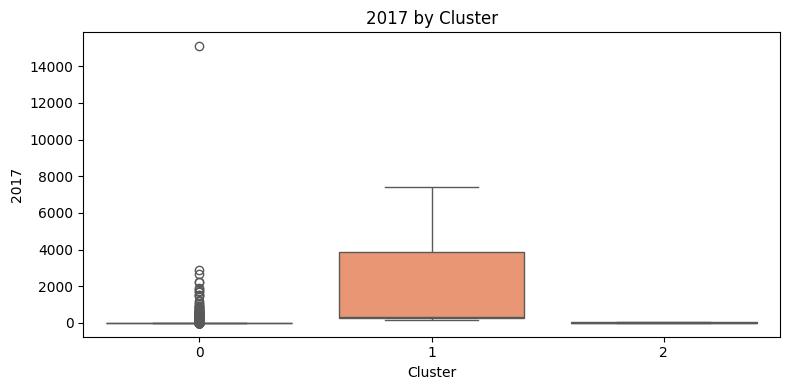

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




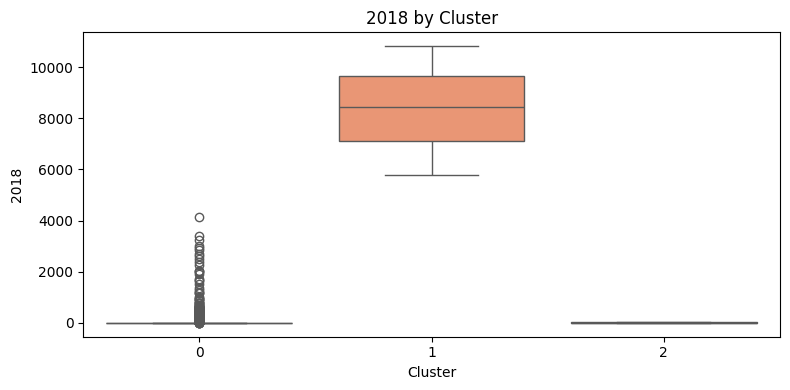

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




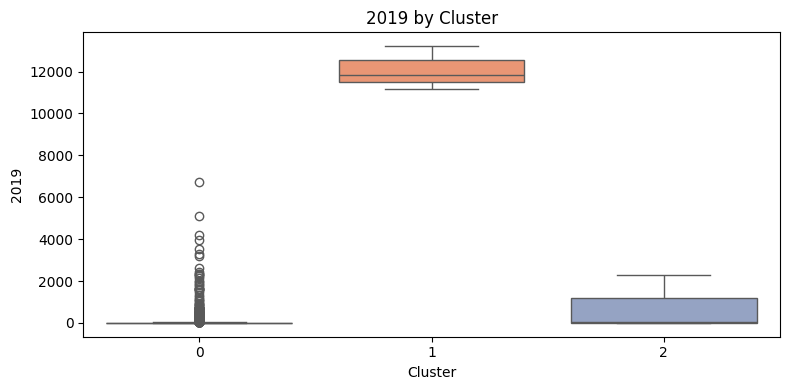

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




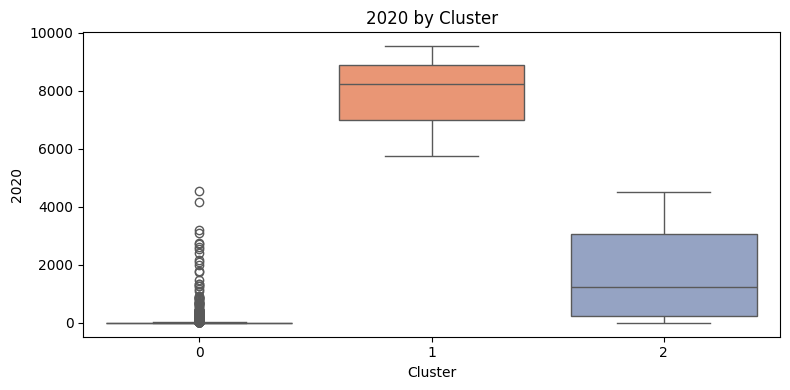

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




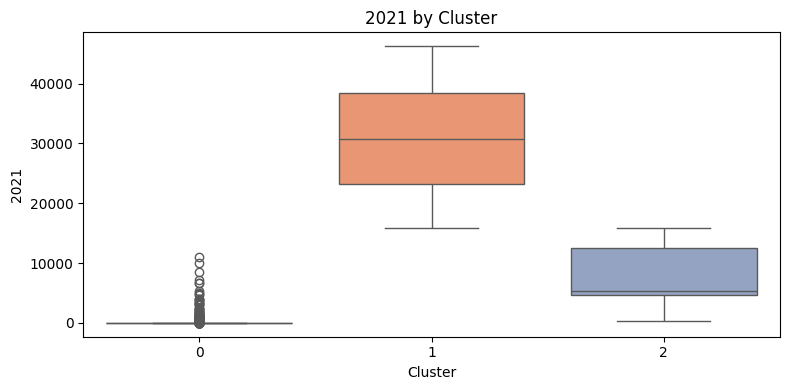

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




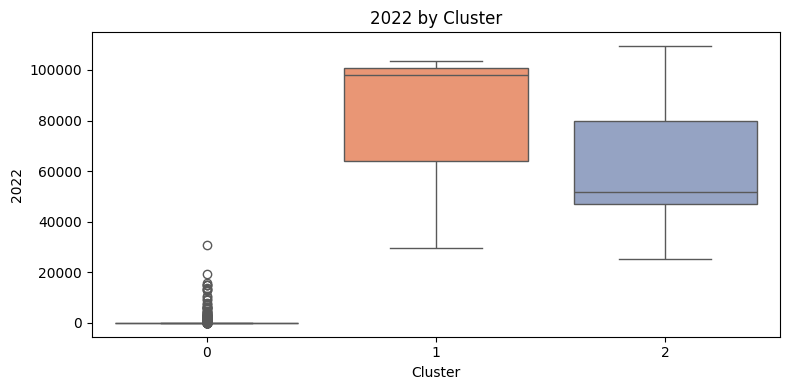

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




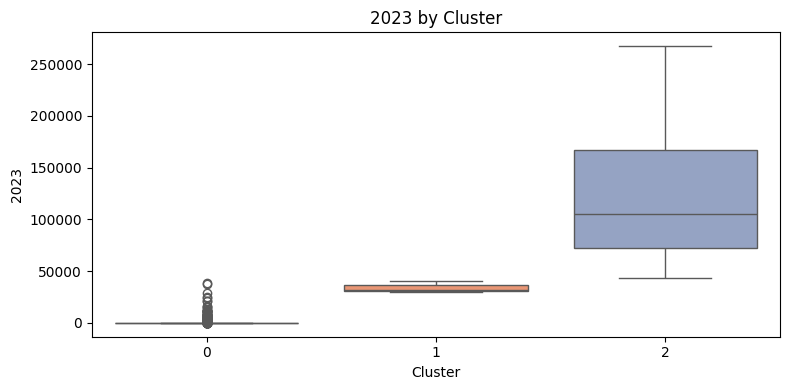

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




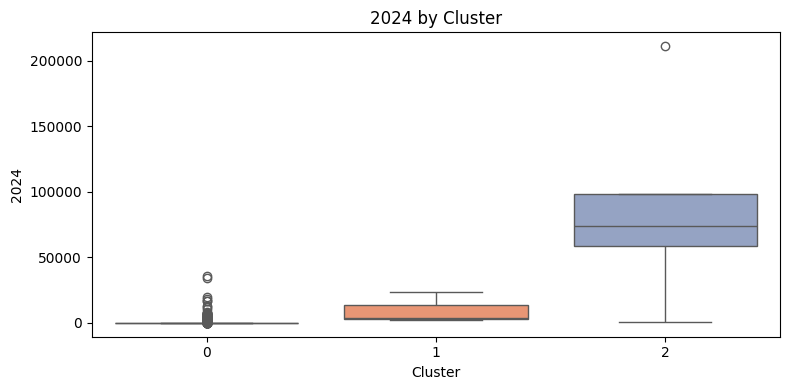

C:\Users\saija\AppData\Local\Temp\ipykernel_31496\3635343621.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




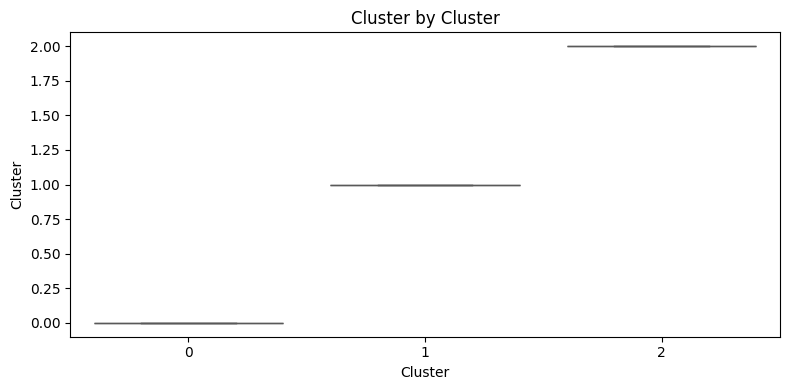

In [285]:
for column in ev_market_clean.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=column, data=ev_market_clean, palette='Set2')
    plt.title(f"{column} by Cluster")
    plt.tight_layout()
    plt.show()

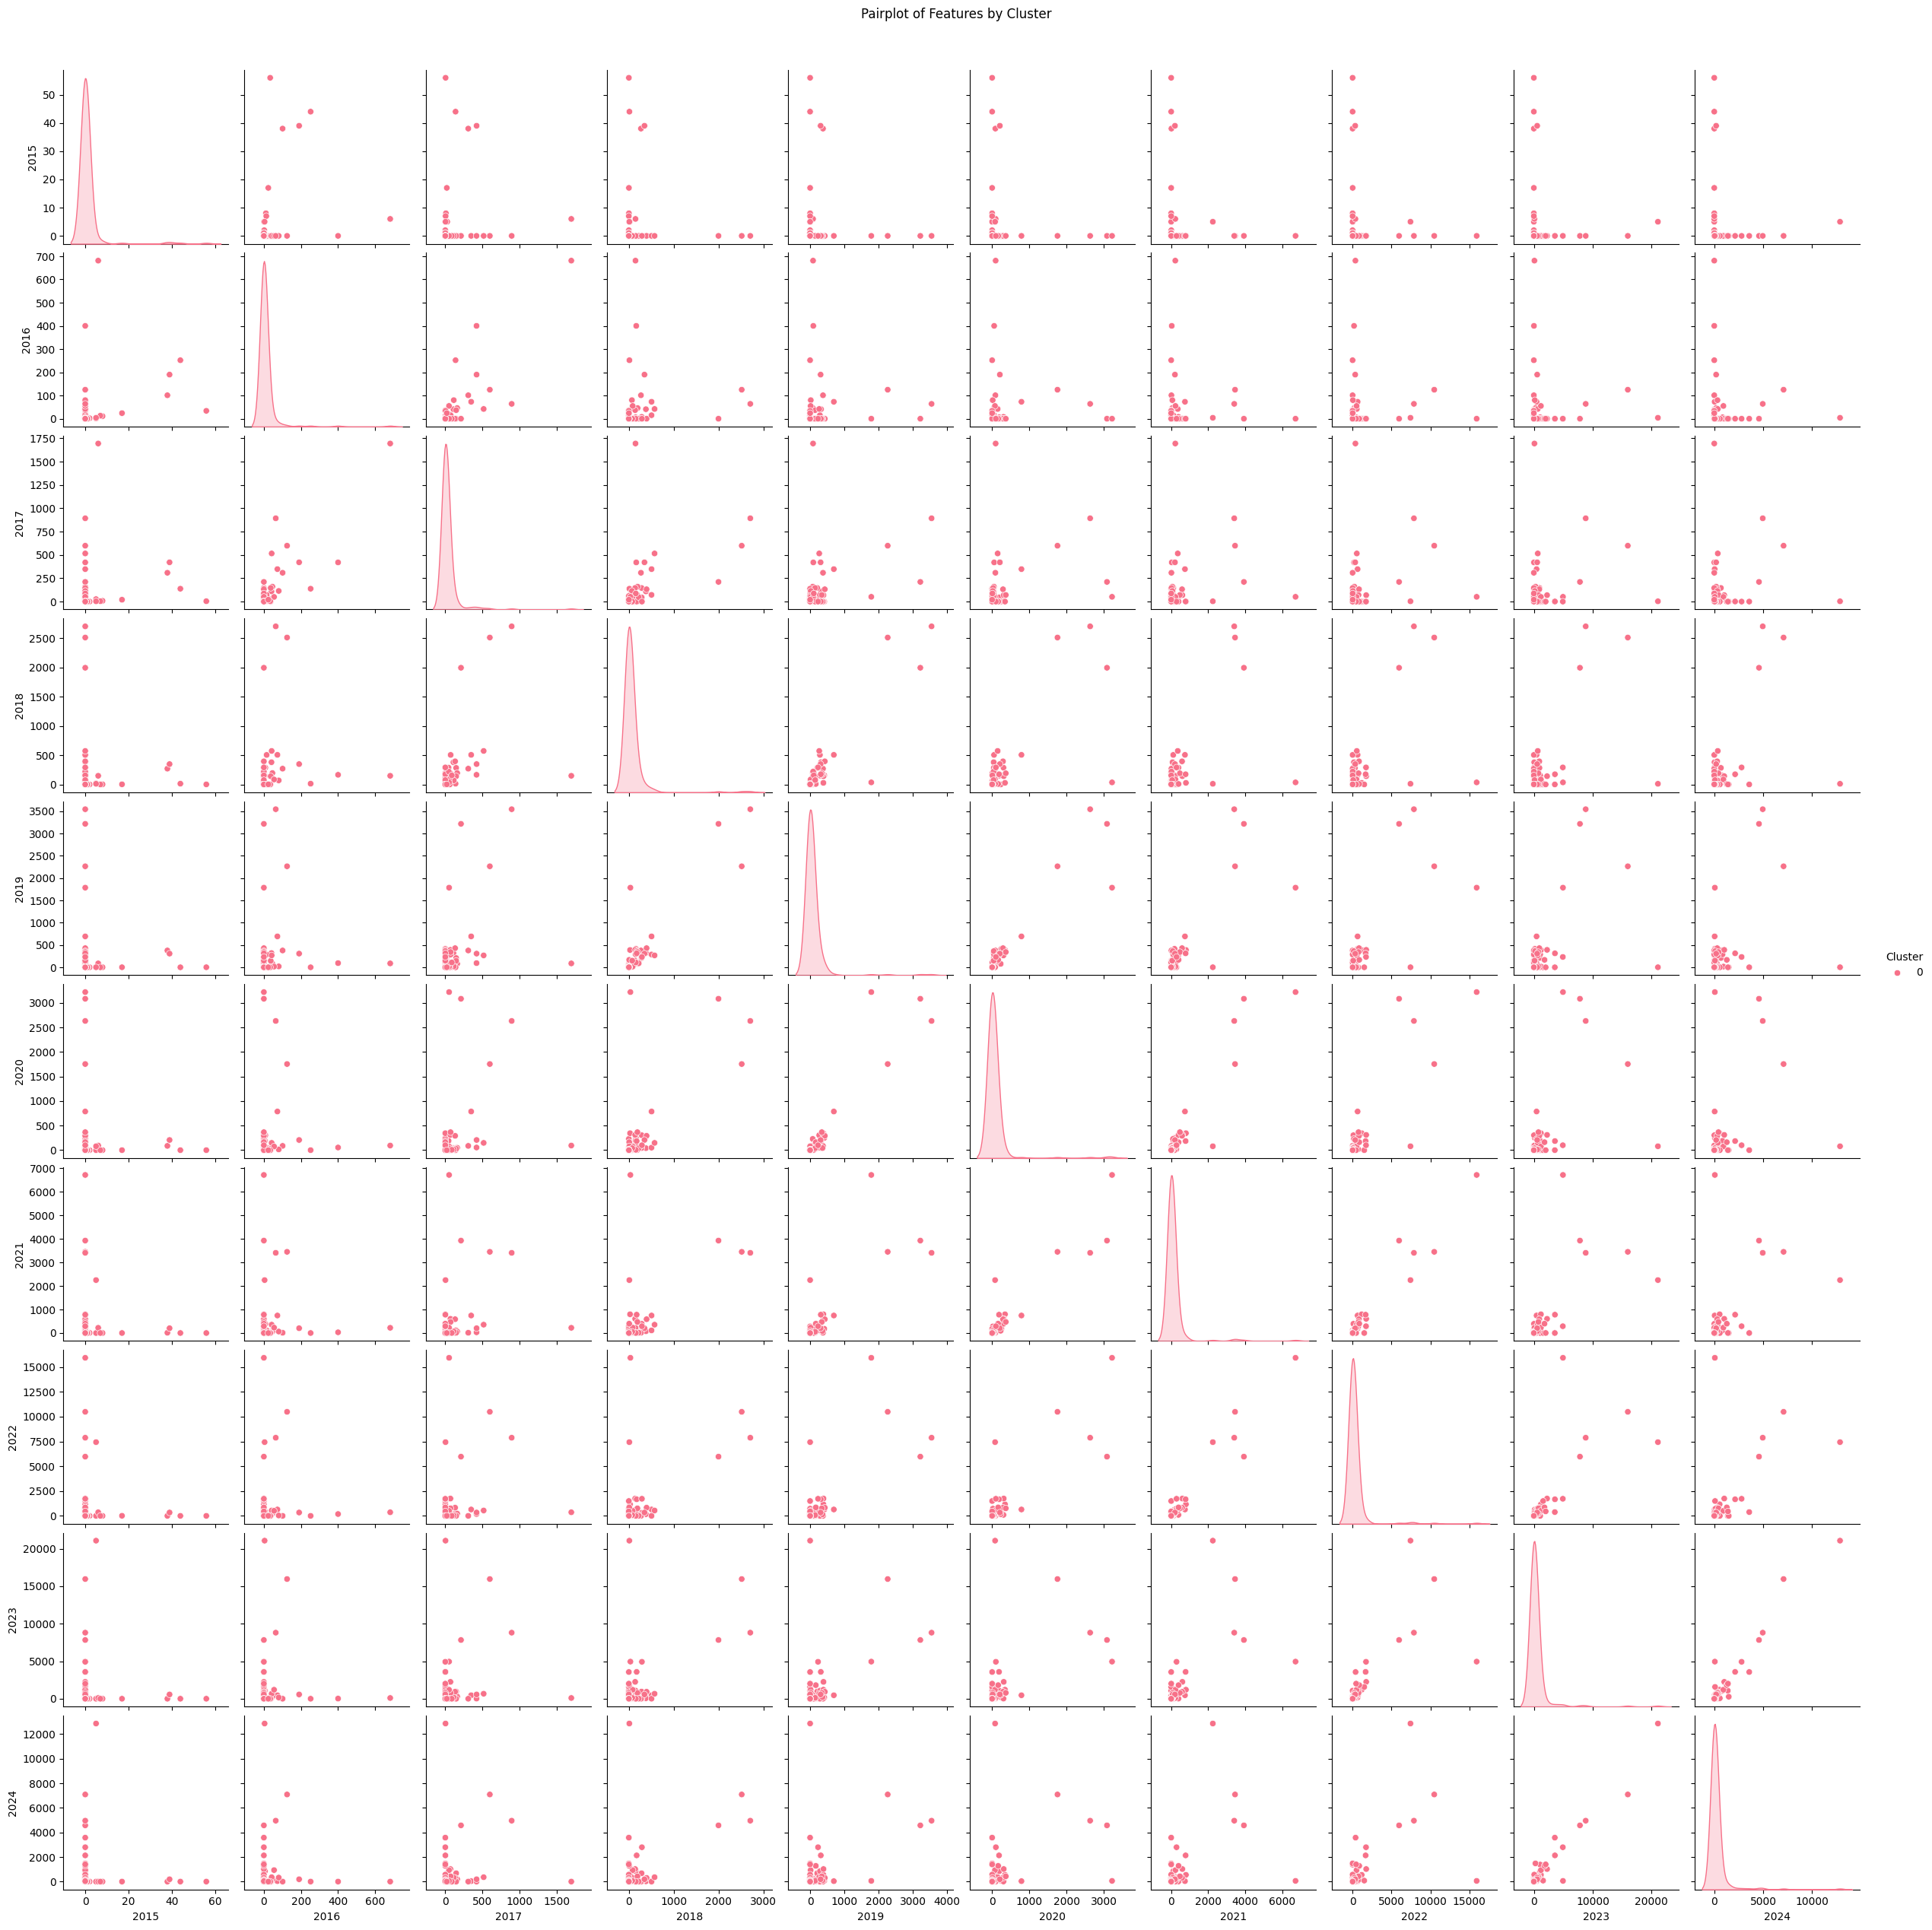

In [286]:
sampled_df = ev_market_clean.sample(n=min(200, len(ev_market_clean)))
sns.pairplot(sampled_df, hue='Cluster', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Features by Cluster", y=1.02)
plt.show()

In [287]:
print(ds2.head())

  Cat                          Maker  2015  2016  2017  2018  2019  2020  \
0  3W    "VOLVO GROUP INDIA PVT LTD"     0     0    31    12     0     0   
1  3W         3EV INDUSTRIES PVT LTD     0     0     0     0     0     0   
2  2W         3GB TECHNOLOGY PVT LTD     0     0     0     1     0     0   
3  3W         3GB TECHNOLOGY PVT LTD     0     1     1     0     0     0   
4  3W  3S INDUSTRIES PRIVATE LIMITED     0     0     0     0    48    66   

   2021  2022  2023  2024  
0     0     0     0     0  
1   112   390   545    51  
2     0     0     0     0  
3     0     0     0     0  
4    43    68   266   578  
